In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()

In [2]:
matches = pd.read_csv('C:\\Users\\preethi\\Downloads\\IPL\\matches.csv')
deliveries = pd.read_csv('C:\\Users\\preethi\\Downloads\\IPL\\deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

### Q1) How many matches we have got in the dataset?

In [5]:
matches['team1'].count()

756

There are 756 in total matches.

### Q2) Which Team had won by maximum runs?

In [6]:
max_runs = matches.groupby(['team1','team2','season'])['win_by_runs'].sum().sort_values(ascending = False).to_frame().head(10)

In [7]:
max_runs.style.background_gradient(cmap='Reds')

Mumbai indians and Delhi daredevils more by max runs with 160.

### Q3) How many seasons we've got in the dataset?

In [8]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

### Q4) Which Team had won by maximum wicket?

In [9]:
max_wick = matches.groupby(['team1','team2','season'])['win_by_wickets'].sum().sort_values(ascending=False).to_frame().head(10)

In [10]:
max_wick.style.background_gradient(cmap='Reds')

Gujrat Lions vs Sunrisers Hyderabad won with maximum wickets.

### Q5) Which Season had most number of matches?

In [11]:
max_season = matches.groupby('season')['season'].count().sort_values(ascending = False).to_frame()

In [12]:
max_season.style.background_gradient(cmap='Reds')

,season
season,
2013,76
2012,74
2011,73
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59


2013 has the maximum number of matches played.

### Q5) The most succesfull IPL team?

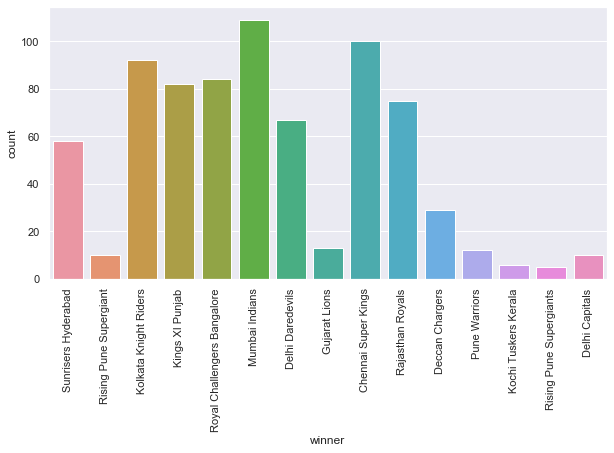

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='winner',data = matches)
plt.xticks(rotation = 90)
plt.show()


### Q6) Top player of the match winners?

In [14]:
player_match = matches['player_of_match'].value_counts()[:10].to_frame()
player_match

,player_of_match
CH Gayle,21
AB de Villiers,20
DA Warner,17
MS Dhoni,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
MEK Hussey,12


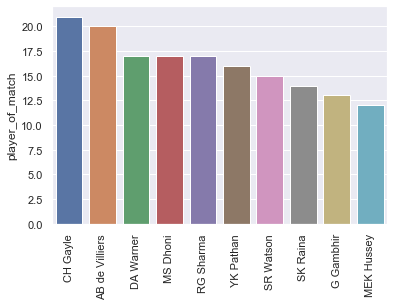

In [15]:
sns.barplot(x= player_match.index,y = player_match['player_of_match'],orient = 'v')
plt.xticks(rotation = 90)
plt.show()

### Q7) Has Toss-winning helped in Match-winning?

In [16]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [26]:
toss = matches['toss_winner'] == matches['winner']

In [32]:
toss.value_counts()

True     393
False    363
dtype: int64

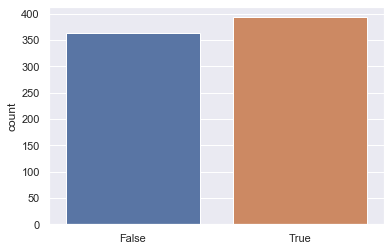

In [35]:
sns.countplot(toss)

### Q8) Which team has won by minium wickets?

In [53]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Q9) Which Team had won by (closest margin) minimum runs?

In [73]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Q10) How many matches are played in each city ?

In [94]:
city = matches.groupby('city')['season'].count().sort_values(ascending=False).to_frame()

In [96]:
city.style.background_gradient(cmap = 'Reds')

,season
city,
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38


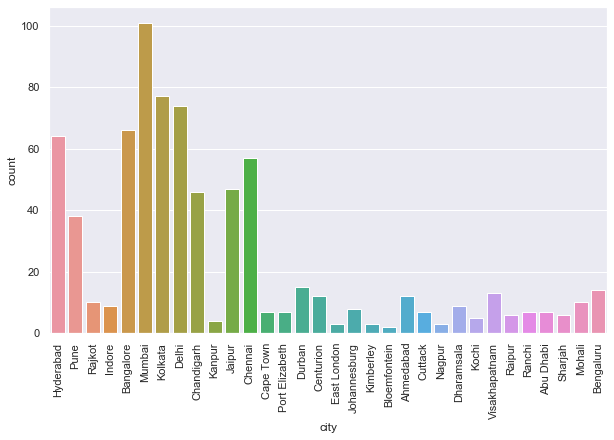

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(x='city',data= matches)
plt.xticks(rotation = 90)
plt.show()

### Q11) Matches played in each stadium?

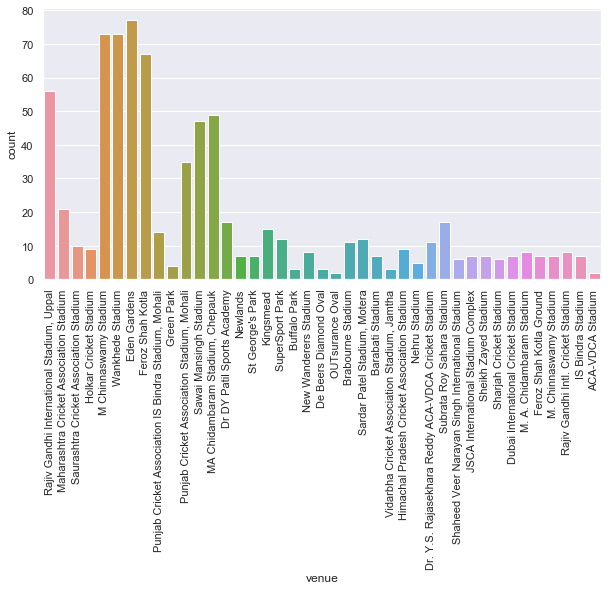

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x='venue',data= matches)
plt.xticks(rotation = 90)
plt.show()